In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [26]:
n_neighbour=5


# # import some data to play with

In [27]:
irish=datasets.load_iris()

In [28]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X=irish.data[:,:2]
y=irish.target


In [29]:
# step size in the mesh
h=0.02

In [30]:
# Create color maps
cmap_light=ListedColormap(['orange','cyan','cornflowerblue'])
cmap_bold=['darkorange','c','darkblue']

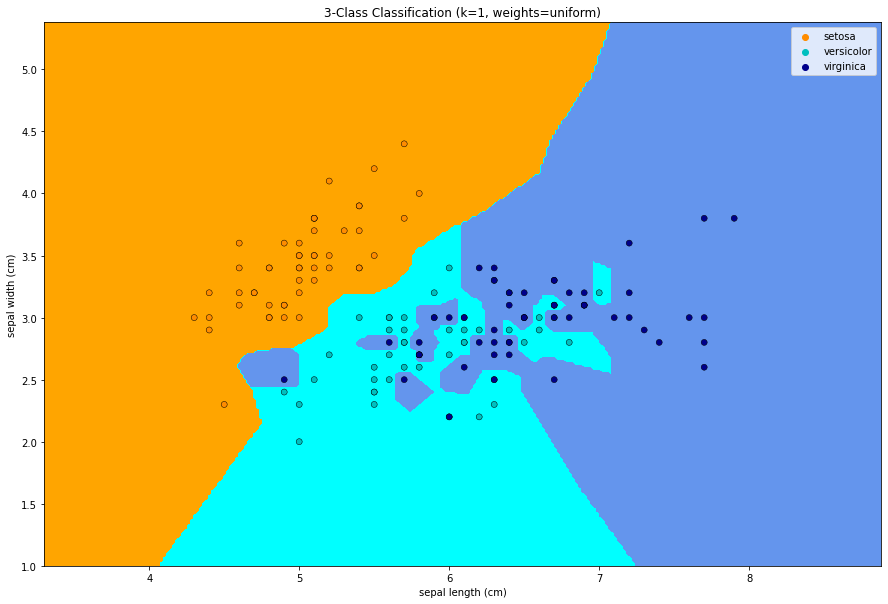

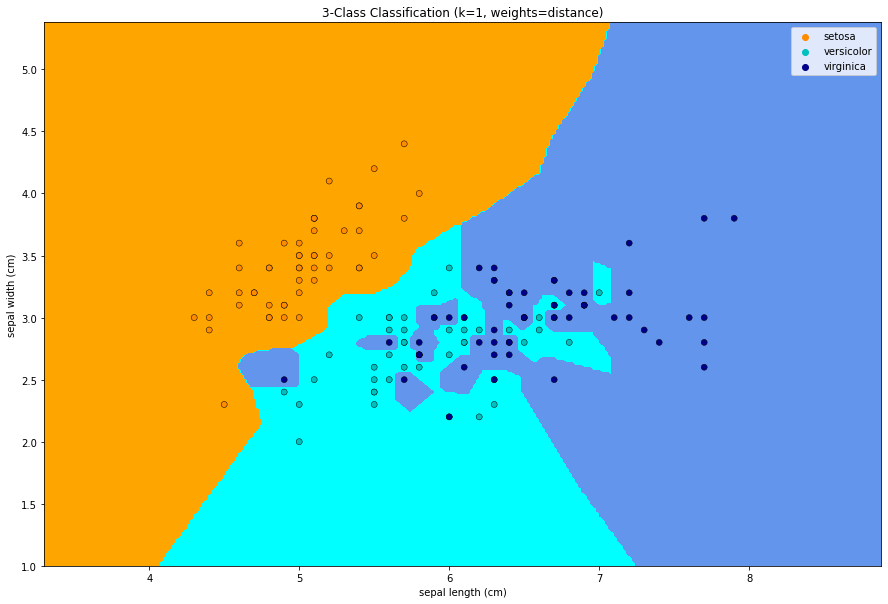

In [31]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf=neighbors.KNeighborsClassifier(n_neighbour,weights=weights)
    clf.fit(X,y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # Put the result into a color plot
    Z=Z.reshape(xx.shape)
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy,Z, cmap=cmap_light)
    
    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=irish.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class Classification (k=%i, weights=%s)" %(n_neighbour, weights))
    plt.xlabel(irish.feature_names[0])
    plt.ylabel(irish.feature_names[1])
    
plt.show()
    
    